# Predicting Machine Failure
Het productieteam heeft voortdurend te kampen met machinestoringen en ze willen die aan de hand van hun sensorgegevens kunnen opsporen voordat ze zich voordoen. De bestaande machines hebben een aantal sensoren, maar ze weten niet zeker welke helpen bij het identificeren van storingen.

# 1. Import Data

## Verbinden met SQL Database

In [1]:
# importeren
import os
import sqlite3
import pandas as pd
import numpy as np

In [2]:
# database path
DB_PATH = os.path.join('database', 'iot.db')

In [3]:
# check
DB_PATH

'database\\iot.db'

In [4]:
# connect met DB
con = sqlite3.connect(DB_PATH)
# cursor is nodig voor SQL statements
cur = con.cursor()

## Welke tabellen zijn beschikbaar

In [5]:
# statement om tabel namen op te halen
TABLE_STATEMENT = '''
    SELECT
        name
    FROM 
        sqlite_master
    WHERE
        type="table"
'''

In [6]:
# cursor kopellen aan TABLE_STATEMENT
res = cur.execute(TABLE_STATEMENT)
tables = res.fetchall()

In [7]:
# alle tabellen
tables

[('training',), ('scoring',)]

## Welke fields zijn beschikbaar

In [8]:
# statement om fields namen op te halen
COLUMN_STATEMENT = '''
    PRAGMA table_info(training)
'''

In [9]:
res = cur.execute(COLUMN_STATEMENT)
columns = res.fetchall()

In [10]:
columns

[(0, 'Sensor 1', '', 0, None, 0),
 (1, 'Sensor 2', '', 0, None, 0),
 (2, 'Sensor 3', '', 0, None, 0),
 (3, 'Sensor 4', '', 0, None, 0),
 (4, 'Sensor 5', '', 0, None, 0),
 (5, 'Sensor 6', '', 0, None, 0),
 (6, 'Sensor 7', '', 0, None, 0),
 (7, 'Sensor 8', '', 0, None, 0),
 (8, 'Sensor 9', '', 0, None, 0),
 (9, 'Sensor 10', '', 0, None, 0),
 (10, 'Sensor 11', '', 0, None, 0),
 (11, 'Sensor 12', '', 0, None, 0),
 (12, 'Sensor 13', '', 0, None, 0),
 (13, 'Sensor 14', '', 0, None, 0),
 (14, 'Sensor 15', '', 0, None, 0),
 (15, 'Sensor 16', '', 0, None, 0),
 (16, 'Sensor 17', '', 0, None, 0),
 (17, 'Sensor 18', '', 0, None, 0),
 (18, 'Sensor 19', '', 0, None, 0),
 (19, 'Sensor 20', '', 0, None, 0),
 (20, 'Sensor 21', '', 0, None, 0),
 (21, 'Sensor 22', '', 0, None, 0),
 (22, 'Sensor 23', '', 0, None, 0),
 (23, 'Sensor 24', '', 0, None, 0),
 (24, 'Sensor 25', '', 0, None, 0),
 (25, 'Sensor 26', '', 0, None, 0),
 (26, 'Sensor 27', '', 0, None, 0),
 (27, 'Sensor 28', '', 0, None, 0),
 (28, 'Sens

## Een aantal kollommen van de DB

In [11]:
# een aantal kolommen
FILTERED_STATEMENT = '''
    SELECT
        "Sensor 1",
        "Sensor 2",
        "Sensor 3",
        "Sensor 4"
    FROM 
        training
    WHERE
        "Sensor 1" > 0.3
'''

In [12]:
res = cur.execute(FILTERED_STATEMENT)
data = res.fetchall()

In [13]:
# check van een rij
data[0]

(2.106008243, 1.765493708, 0.072487791, 0.164543308)

In [14]:
# omzetten naar DataFrame
cols = np.array(cur.description)[:,0]
df = pd.DataFrame(data, columns=cols)
df

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
0,2.106008,1.765494,0.072488,0.164543
1,2.400997,0.410752,0.745569,1.467640
2,0.675427,1.217458,1.491454,0.658602
3,1.745153,1.174935,2.206422,1.793800
4,2.090793,1.094919,0.785266,1.364575
...,...,...,...,...
4980,1.408515,0.787214,-0.248448,-0.049482
4981,1.564620,0.046474,0.791283,1.167041
4982,1.017270,0.113397,-0.350538,0.516130
4983,2.577296,1.352424,3.037584,1.610227


## Alle data

In [15]:
ALL_DATA_STATEMENT = '''
    SELECT
        *
    FROM 
        training
'''

In [16]:
res = cur.execute(ALL_DATA_STATEMENT)
all_data = res.fetchall()

In [17]:
# haal kolomnamen op
cols = np.array(cur.description)[:,0]

In [18]:
cols

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5',
       'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10',
       'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15',
       'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20',
       'Sensor 21', 'Sensor 22', 'Sensor 23', 'Sensor 24', 'Sensor 25',
       'Sensor 26', 'Sensor 27', 'Sensor 28', 'Sensor 29', 'Sensor 30',
       'Sensor 31', 'Sensor 32', 'Sensor 33', 'Sensor 34', 'Sensor 35',
       'Sensor 36', 'Sensor 37', 'Sensor 38', 'Sensor 39', 'Sensor 40',
       'Sensor 41', 'Sensor 42', 'Sensor 43', 'Sensor 44', 'Sensor 45',
       'Sensor 46', 'Sensor 47', 'Sensor 48', 'Sensor 49', 'Sensor 50',
       'Sensor 51', 'Sensor 52', 'Sensor 53', 'Sensor 54', 'Sensor 55',
       'Sensor 56', 'Sensor 57', 'Sensor 58', 'Sensor 59', 'Sensor 60',
       'Sensor 61', 'Sensor 62', 'Sensor 63', 'Sensor 64', 'Sensor 65',
       'Sensor 66', 'Sensor 67', 'Sensor 68', 'Sensor 69', 'Sensor 70',
 

In [19]:
# sluit de connectie met de DB
cur.close()
con.close()

## SQL resultaat omzetten naar DataFrame

In [20]:
# omzetten naar DataFrame
df = pd.DataFrame(all_data, columns=cols)
df.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Machine Failure
0,2.106008,1.765494,0.072488,0.164543,2.928143,1.645433,1.819063,0.332035,0.665590,24.531377,...,1.668703,-1.748165,0.075639,2.383862,-0.556234,0.152506,51.825760,49.461068,14.322512,Running
1,2.400997,0.410752,0.745569,1.467640,-1.136906,14.676396,0.257288,0.892593,1.418290,18.658616,...,1.835808,-1.923228,1.488724,2.622583,-0.611936,1.178079,5.891962,42.905350,14.279731,Running
2,0.675427,1.217458,1.491454,0.658602,0.947287,6.586024,2.771511,5.866576,1.928395,27.855573,...,1.411937,-1.479172,-0.942776,2.017053,-0.470646,1.153371,21.134473,-54.254697,14.196304,Running
3,0.295065,2.583267,1.397774,1.222003,0.384710,12.220032,2.332653,14.873609,3.130726,41.486420,...,-0.843319,0.883477,0.568646,-1.204742,0.281106,0.932500,33.129568,44.200473,14.168624,Running
4,1.745153,1.174935,2.206422,1.793800,0.646555,17.937999,2.027426,2.042624,0.336993,9.490009,...,-0.490529,0.513887,-0.244071,-0.700755,0.163510,0.737156,45.813705,42.141305,14.189116,Running


# 2. Splitten van de Data om Data Snooping Bias te voorkomen

In [21]:
# importeren
from sklearn.model_selection import train_test_split

In [22]:
train, test = train_test_split(df, stratify=df['Machine Failure'], test_size=0.3, random_state=1234)

In [23]:
# check
print(train.shape)
print(test.shape)

(4571, 103)
(1959, 103)


# 3. Exploratory Data Analysis (EDA)

## Algemene Analyse

In [24]:
train.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Machine Failure
1526,1.382209,0.959569,2.039691,1.631576,1.471266,16.315762,-0.123216,-0.498342,1.487315,26.543901,...,-0.711609,0.745496,-0.102864,-1.016585,0.237203,0.774204,-11.966185,93.582906,14.215192,Running
2814,1.114661,1.753120,0.777757,-1.165778,1.167658,-11.657782,0.838125,-3.917132,2.405440,13.810468,...,5.063426,-5.304542,0.682722,7.233466,-1.687809,-1.067554,-7.777302,-42.982352,14.511462,Running
6488,0.919949,-0.244303,0.442553,-0.542031,0.603301,-5.420310,1.906050,-0.214311,0.124462,10.368780,...,3.446293,-3.610402,0.890708,4.923276,-1.148764,0.163332,11.428224,-34.112278,14.363741,Running
66,0.563256,0.441737,-0.355619,-0.392601,3.242510,-3.926010,1.755904,-2.863108,2.491936,27.802933,...,4.585939,-4.804317,1.280206,6.551342,-1.528646,0.465513,29.378841,-1.431505,14.443738,Running
6077,1.784603,1.021679,2.323915,0.556113,-1.850188,5.561133,1.123146,-0.006424,-0.006171,1.863274,...,7.522060,-7.880253,1.340799,10.745799,-2.507353,0.596541,23.461976,24.837348,14.459019,Running


In [25]:
# unieke waardes, check of het een binairy classification gaat worden
train['Machine Failure'].unique()

array(['Running', 'Failure'], dtype=object)

In [26]:
# update de max kolommen en rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
train.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25,Sensor 26,Sensor 27,Sensor 28,Sensor 29,Sensor 30,Sensor 31,Sensor 32,Sensor 33,Sensor 34,Sensor 35,Sensor 36,Sensor 37,Sensor 38,Sensor 39,Sensor 40,Sensor 41,Sensor 42,Sensor 43,Sensor 44,Sensor 45,Sensor 46,Sensor 47,Sensor 48,Sensor 49,Sensor 50,Sensor 51,Sensor 52,Sensor 53,Sensor 54,Sensor 55,Sensor 56,Sensor 57,Sensor 58,Sensor 59,Sensor 60,Sensor 61,Sensor 62,Sensor 63,Sensor 64,Sensor 65,Sensor 66,Sensor 67,Sensor 68,Sensor 69,Sensor 70,Sensor 71,Sensor 72,Sensor 73,Sensor 74,Sensor 75,Sensor 76,Sensor 77,Sensor 78,Sensor 79,Sensor 80,Sensor 81,Sensor 82,Sensor 83,Sensor 84,Sensor 85,Sensor 86,Sensor 87,Sensor 88,Sensor 89,Sensor 90,Sensor 91,Sensor 92,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Machine Failure
2710,-0.340178,1.294278,0.781184,-1.480923,0.068733,-14.809227,1.906972,-17.471799,3.712036,-0.380248,22.159835,21.657676,-5.190124,1.478616,1.756826,-0.380248,22.159835,21.657676,-5.190124,1.478616,1.756826,0.385086,0.454042,0.011809,2.168049,10.032955,10.022683,10.254486,14.181475,14.174210,14.339056,17.365721,17.359789,17.494644,20.050494,20.045356,20.162257,5.133131,4.841805,2.212095,-0.560806,0.068733,2.398764,0.751035,-0.085267,-0.092462,0.068733,-0.153613,-0.069442,0.462104,0.484180,0.123826,0.123826,-0.015537,0.027705,0.007424,6.218980,0.626622,1.521575,-0.932482,2.699274,0.873718,1.268828,1.223922,-0.366679,12.216478,14.659774,17.591728,21.110074,25.332089,30.398506,36.478208,43.773849,52.528619,63.034343,75.641212,90.769454,108.923345,0.852094,-0.051008,0.173435,0.173435,0.173435,0.173435,0.173435,0.173435,0.173435,1.970726,-0.153023,0.986703,1.388508,17.196463,3.626465,3.807788,-3.989111,-0.932482,5.439697,-1.269263,-0.008847,21.657676,90.769454,14.339056,Running
5934,-0.310678,1.856229,0.641760,0.546215,1.165328,5.462155,1.566315,-0.314224,-0.220368,7.411216,41.331922,26.189019,-1.294392,9.816893,-1.435316,7.411216,41.331922,26.189019,-1.294392,9.816893,-1.435316,0.088468,0.268201,2.861348,2.393097,10.016992,10.414198,10.295393,14.163627,14.447274,14.361870,17.345793,17.578166,17.508041,20.028598,20.230178,20.169277,4.358964,3.087912,1.043529,-0.507114,1.165328,2.305146,0.519839,-0.616678,-1.362236,1.165328,-0.738968,-0.708143,0.106162,0.308791,1.396418,1.396418,-0.023214,0.045777,0.602138,-0.921657,0.927856,0.465987,1.741442,1.522061,0.123318,1.500047,0.961891,1.023063,-4.401882,-5.282258,-6.338710,-7.606452,-9.127742,-10.953290,-13.143949,-15.772738,-18.927286,-22.712743,-27.255292,-32.706350,-39.247620,1.011587,2.062418,0.185852,0.185852,0.185852,0.185852,0.185852,0.185852,0.185852,1.397820,6.187253,0.153970,1.929666,-2.062546,1.423834,1.495025,-1.566217,1.741442,2.135751,-0.498342,0.383304,26.189019,-32.706350,14.361870,Running
6495,3.317952,1.380904,0.702294,0.841608,1.849806,8.416081,1.665403,0.546900,0.234116,-6.652780,11.251962,15.287858,-8.326390,0.015674,0.998611,-6.652780,11.251962,15.287858,-8.326390,0.015674,0.998611,0.614885,-0.127624,0.195180,0.606461,9.994432,9.995523,10.012001,14.133685,14.134456,14.146114,17.309922,17.310552,17.320073,19.987641,19.988187,19.996432,2.250449,8.959334,3.542002,1.257048,1.849806,1.841352,0.595787,8.236199,4.281687,1.849806,9.035548,2.550972,0.737862,0.895933,2.029336,2.029336,1.686384,1.341543,3.689636,2.925354,-0.059217,-0.975081,1.412931,-0.663128,1.869017,2.206938,0.670450,2.102636,3.386107,4.063328,4.875993,5.851192,7.021431,8.425717,10.110860,12.133032,14.559638,17.471566,20.965879,25.159055,30.190866,1.676480,2.060402,1.802104,1.802104,1.802104,1.802104,1.802104,1.802104,1.802104,0.020928,6.181207,0.846722,1.909574,13.410566,2.879640,3.023622,-3.167604,1.412931,4.319461,-1.007874,3.713060,15.287858,25.159055,14.146114,Running
2031,0.942987,1.208896,0.

In [28]:
# check types
train.dtypes

Sensor 1           float64
Sensor 2           float64
Sensor 3           float64
Sensor 4           float64
Sensor 5           float64
Sensor 6           float64
Sensor 7           float64
Sensor 8           float64
Sensor 9           float64
Sensor 10          float64
Sensor 11          float64
Sensor 12          float64
Sensor 13          float64
Sensor 14          float64
Sensor 15          float64
Sensor 16          float64
Sensor 17          float64
Sensor 18          float64
Sensor 19          float64
Sensor 20          float64
Sensor 21          float64
Sensor 22          float64
Sensor 23          float64
Sensor 24          float64
Sensor 25          float64
Sensor 26          float64
Sensor 27          float64
Sensor 28          float64
Sensor 29          float64
Sensor 30          float64
Sensor 31          float64
Sensor 32          float64
Sensor 33          float64
Sensor 34          float64
Sensor 35          float64
Sensor 36          float64
Sensor 37          float64
S

In [29]:
# statische waardes
train.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25,Sensor 26,Sensor 27,Sensor 28,Sensor 29,Sensor 30,Sensor 31,Sensor 32,Sensor 33,Sensor 34,Sensor 35,Sensor 36,Sensor 37,Sensor 38,Sensor 39,Sensor 40,Sensor 41,Sensor 42,Sensor 43,Sensor 44,Sensor 45,Sensor 46,Sensor 47,Sensor 48,Sensor 49,Sensor 50,Sensor 51,Sensor 52,Sensor 53,Sensor 54,Sensor 55,Sensor 56,Sensor 57,Sensor 58,Sensor 59,Sensor 60,Sensor 61,Sensor 62,Sensor 63,Sensor 64,Sensor 65,Sensor 66,Sensor 67,Sensor 68,Sensor 69,Sensor 70,Sensor 71,Sensor 72,Sensor 73,Sensor 74,Sensor 75,Sensor 76,Sensor 77,Sensor 78,Sensor 79,Sensor 80,Sensor 81,Sensor 82,Sensor 83,Sensor 84,Sensor 85,Sensor 86,Sensor 87,Sensor 88,Sensor 89,Sensor 90,Sensor 91,Sensor 92,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4.571000e+03,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4.571000e+03,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,1.017857,0.987795,0.997633,1.007020,0.986144,10.070205,1.036881,1.638584,0.963613,14.714748,16.343000,14.908261,2.357374,2.984878e+00,1.007779,14.714748,16.343000,14.908261,2.357374,2.984878e+00,1.007779,1.005972,1.034620,1.012852,1.008781,10.152158,10.152033,10.150611,14.286539,14.286461,14.285442,17.468247,17.468187,17.467351,20.153734,20.153683,20.152958,4.871498,5.107285,1.005360,1.015729,0.986144,1.001372,0.981653,0.956550,1.005444,0.986144,0.999324,0.968234,1.207166,0.510729,0.956168,0.956168,0.638479,0.593558,3.731680,11.211629,1.002373,0.992859,1.011089,0.992396,0.984685,0.988718,1.023633,1.012122,5.955212,7.146254,8.575505,10.290606,12.348727,14.818473,17.782167,21.338601,25.606321,30.727585,36.873102,44.247723,53.097267,1.011652,1.021844,1.014178,1.014178,1.014178,1.014178,1.014178,1.014178,1.014178,1.011044,3.065531,0.985513,1.014776,9.955648,1.999458,2.099431,-2.199404,1.011089,2.999187,-0.699810,1.038502,14.908261,44.247723,14.285442
std,0.979800,0.990494,0.998358,1.001622,1.024145,10.016223,1.012838,4.391955,1.003892,15.213086,16.072047,14.989871,7.606543,4.178067e+00,1.005145,15.213086,16.072047,14.989871,7.606543,4.178067e+00,1.005145,0.996170,0.993661,1.010078,0.999609,0.160932,0.129425,0.127920,0.147089,0.110368,0.109676,0.147588,0.110543,0.110225,0.151874,0.115965,0.115842,4.989832,5.001586,0.989607,1.006747,1.024145,1.002780,0.994952,2.659555,2.676400,1.024145,5.169530,3.773903,1.195404,0.500159,2.569771,2.569771,4.671763,3.062522,16.739077,11.133298,1.005643,0.982789,1.004734,1.003811,0.996099,0.989616,0.996791,0.993013,6.029295,7.235154,8.682185,10.418622,12.502346,15.002816,18.003379,21.604054,25.924865,31.109838,37.331806,44.798167,53.757801,1.000864,1.000314,1.003888,1.003888,1.003888,1.003888,

In [30]:
train.describe(include='object')

,Machine Failure
count,4571
unique,2
top,Running
freq,3946


In [31]:
# check NaN
train.isnull().sum()

Sensor 1           0
Sensor 2           0
Sensor 3           0
Sensor 4           0
Sensor 5           0
Sensor 6           0
Sensor 7           0
Sensor 8           0
Sensor 9           0
Sensor 10          0
Sensor 11          0
Sensor 12          0
Sensor 13          0
Sensor 14          0
Sensor 15          0
Sensor 16          0
Sensor 17          0
Sensor 18          0
Sensor 19          0
Sensor 20          0
Sensor 21          0
Sensor 22          0
Sensor 23          0
Sensor 24          0
Sensor 25          0
Sensor 26          0
Sensor 27          0
Sensor 28          0
Sensor 29          0
Sensor 30          0
Sensor 31          0
Sensor 32          0
Sensor 33          0
Sensor 34          0
Sensor 35          0
Sensor 36          0
Sensor 37          0
Sensor 38          0
Sensor 39          0
Sensor 40          0
Sensor 41          0
Sensor 42          0
Sensor 43          0
Sensor 44          0
Sensor 45          0
Sensor 46          0
Sensor 47          0
Sensor 48    

## Distributions

In [32]:
# import
from matplotlib import pyplot as plt
import seaborn as sns

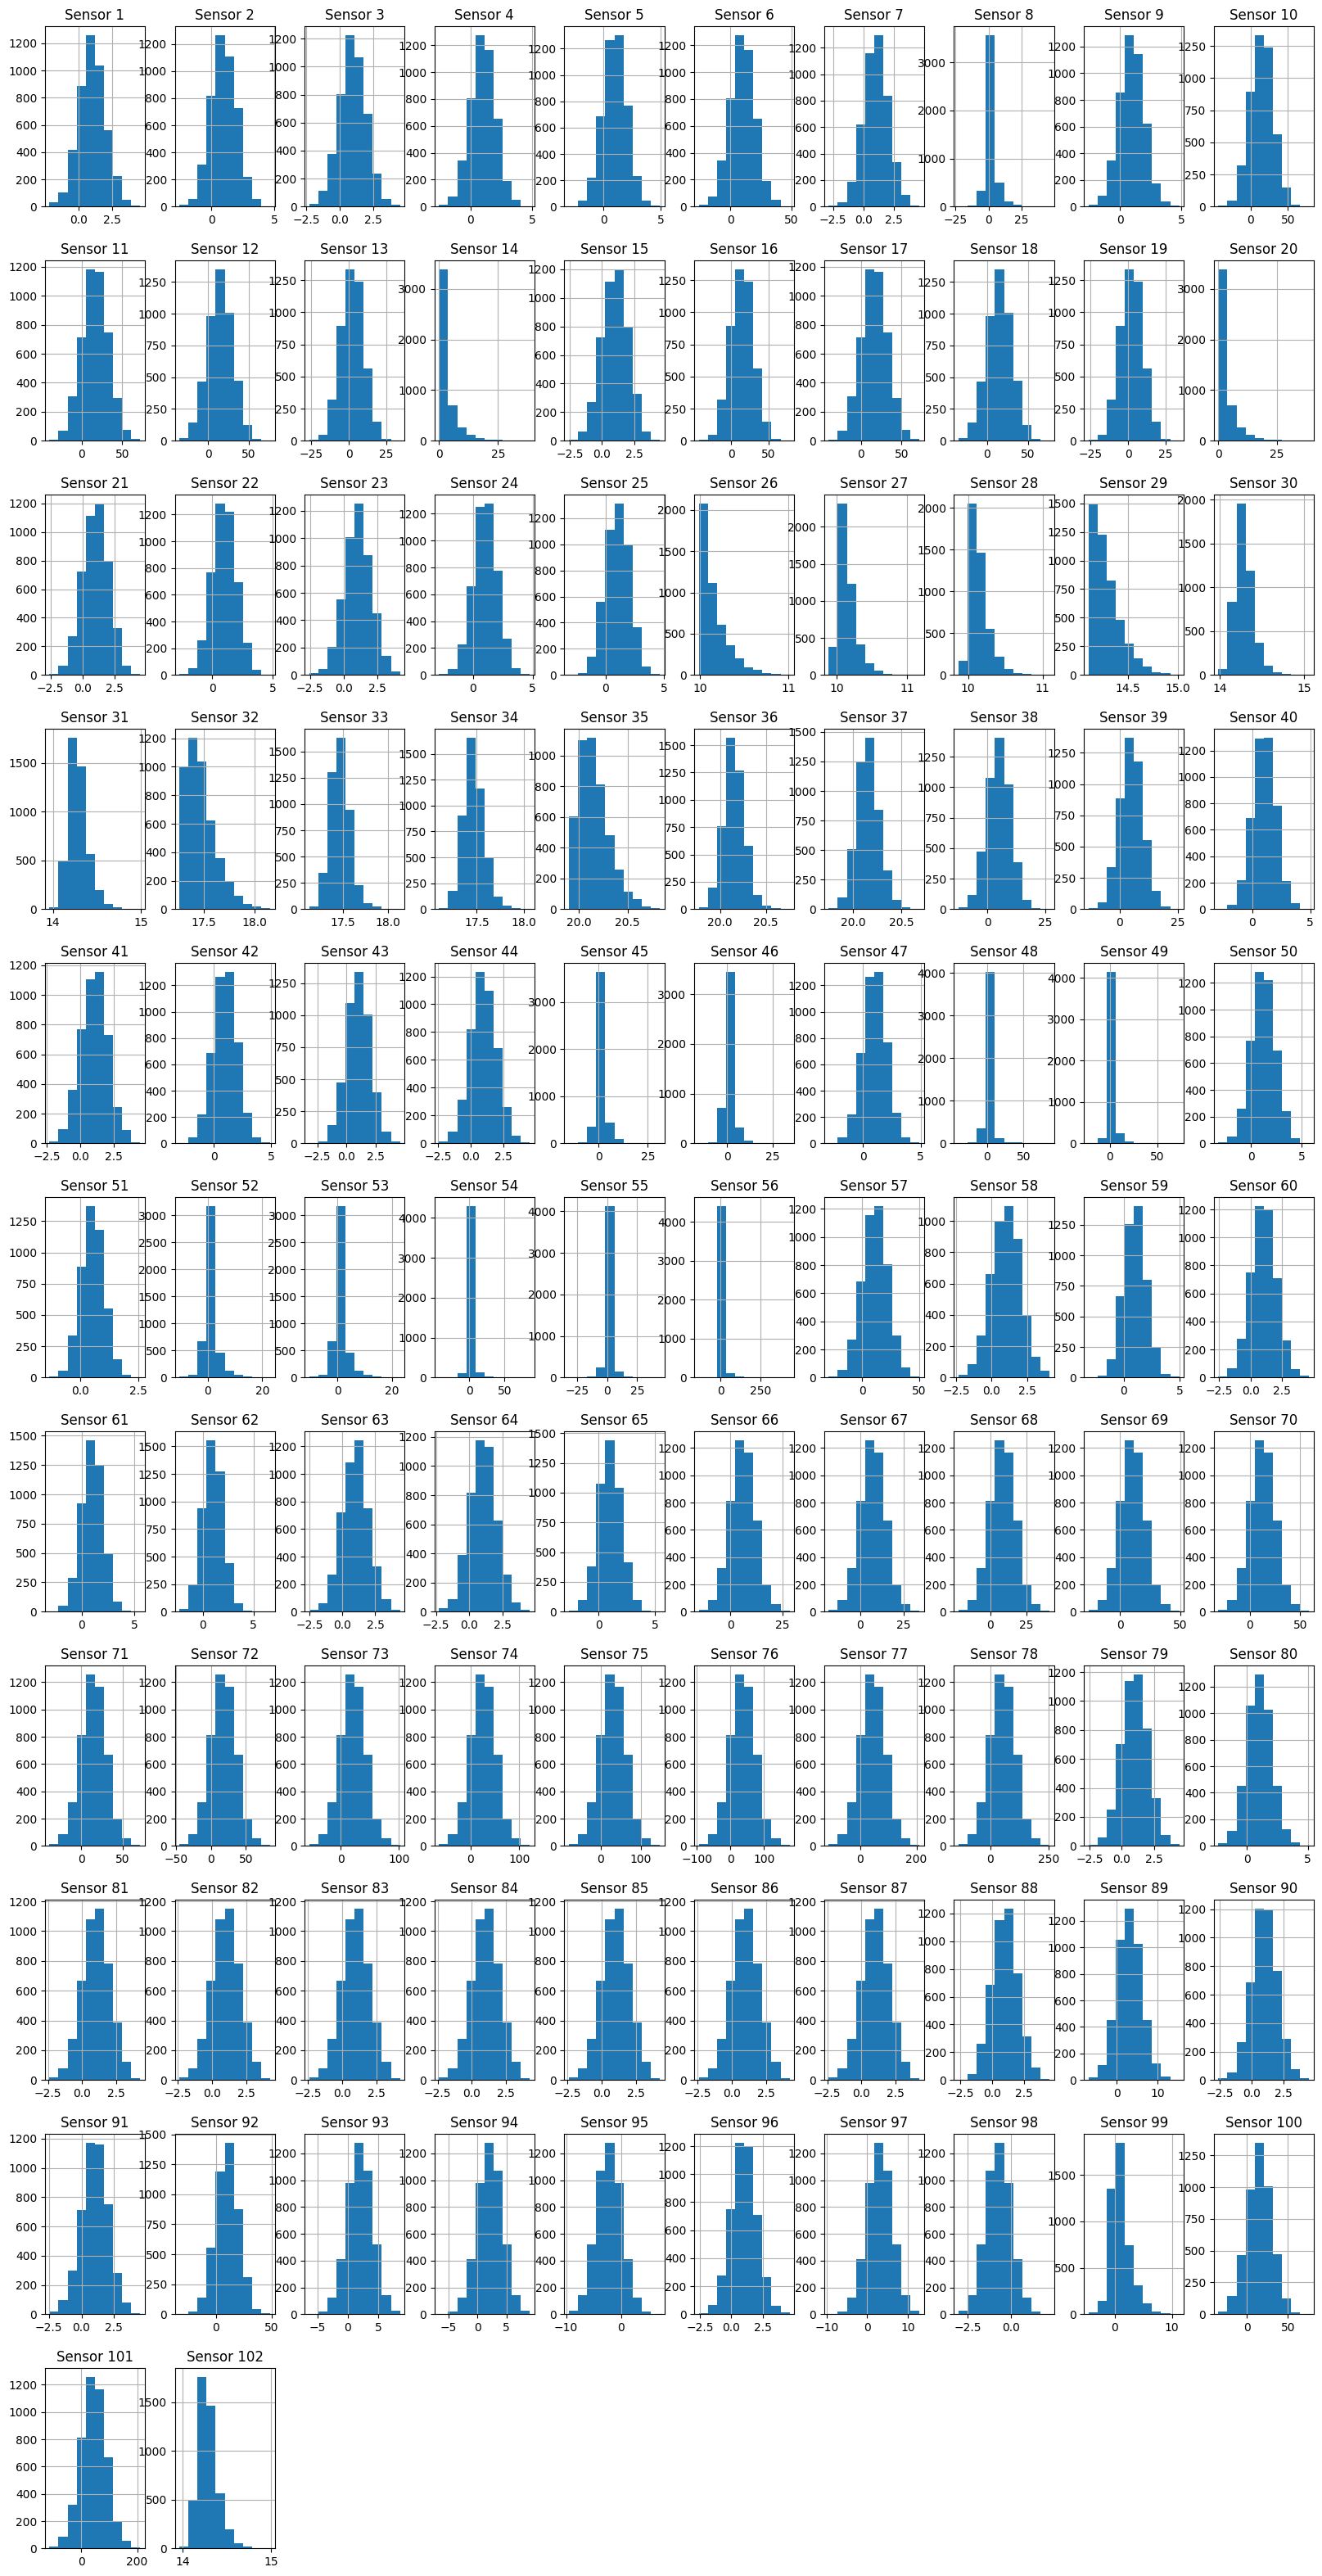

In [33]:
# plot histogrammen
train.hist(figsize=(20,40))
plt.show()

## Correlation

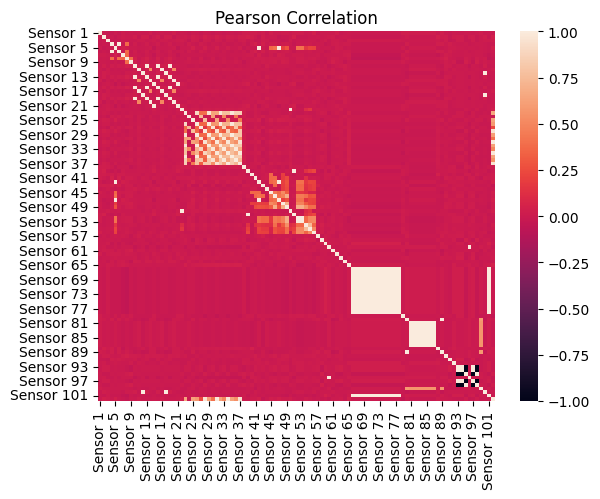

In [34]:
# corr heatmap
plt.title('Pearson Correlation')
sns.heatmap(train.select_dtypes(exclude='object').corr())
plt.show()

In [35]:
temp = train.copy()
temp['OneHotTarget'] = temp['Machine Failure'].apply(lambda x: 1 if x=='Failure' else 0)

In [36]:
# check
temp['OneHotTarget'].unique()

array([0, 1], dtype=int64)

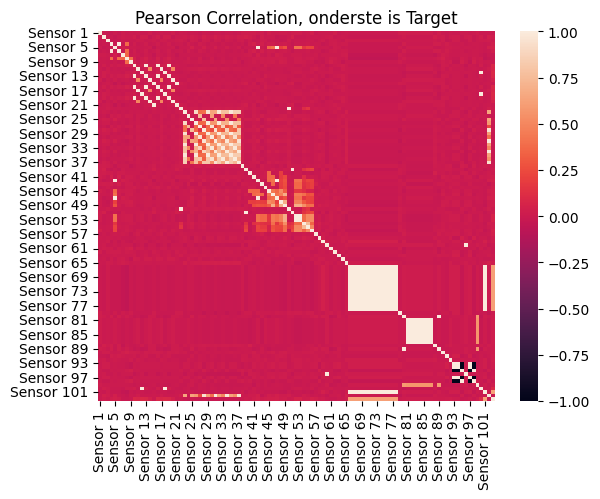

In [37]:
# corr heatmap
plt.title('Pearson Correlation, onderste is Target')
sns.heatmap(temp.select_dtypes(exclude='object').corr())
plt.show()

In [38]:
# maak een variable van de interresante kolommen
filter_col = [*list(temp.columns[64:80]), 'OneHotTarget']

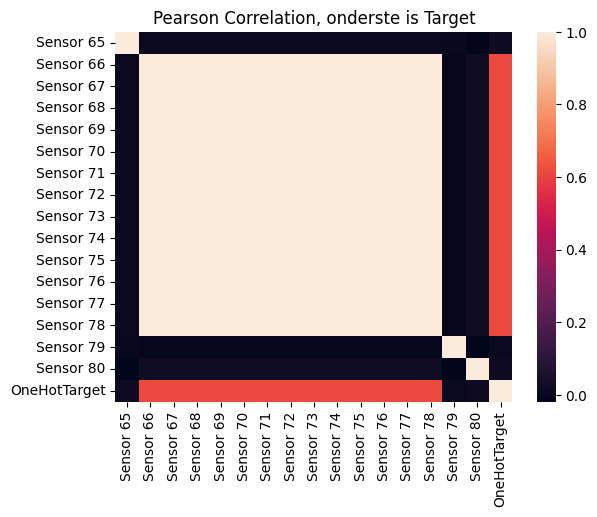

In [39]:
# corr heatmap
plt.title('Pearson Correlation, onderste is Target')
sns.heatmap(temp[filter_col].select_dtypes(exclude='object').corr())
plt.show()

## Target balanced?

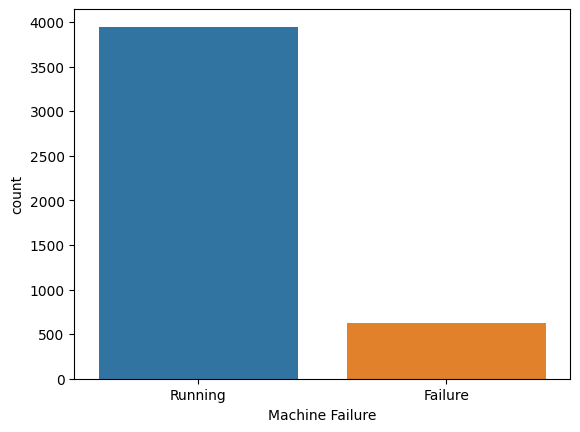

In [40]:
# check
sns.countplot(
    data=train,
    x='Machine Failure')
plt.show()

# 4. Preprocessing

## Split Features en Targets

In [41]:
# splitten
X_train = train.drop('Machine Failure', axis=1)
y_train = train['Machine Failure']

In [42]:
# check
print(X_train.shape)
print(y_train.shape)

(4571, 102)
(4571,)


In [43]:
X_train.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25,Sensor 26,Sensor 27,Sensor 28,Sensor 29,Sensor 30,Sensor 31,Sensor 32,Sensor 33,Sensor 34,Sensor 35,Sensor 36,Sensor 37,Sensor 38,Sensor 39,Sensor 40,Sensor 41,Sensor 42,Sensor 43,Sensor 44,Sensor 45,Sensor 46,Sensor 47,Sensor 48,Sensor 49,Sensor 50,Sensor 51,Sensor 52,Sensor 53,Sensor 54,Sensor 55,Sensor 56,Sensor 57,Sensor 58,Sensor 59,Sensor 60,Sensor 61,Sensor 62,Sensor 63,Sensor 64,Sensor 65,Sensor 66,Sensor 67,Sensor 68,Sensor 69,Sensor 70,Sensor 71,Sensor 72,Sensor 73,Sensor 74,Sensor 75,Sensor 76,Sensor 77,Sensor 78,Sensor 79,Sensor 80,Sensor 81,Sensor 82,Sensor 83,Sensor 84,Sensor 85,Sensor 86,Sensor 87,Sensor 88,Sensor 89,Sensor 90,Sensor 91,Sensor 92,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
1526,1.382209,0.959569,2.039691,1.631576,1.471266,16.315762,-0.123216,-0.498342,1.487315,26.543901,-1.681403,-11.966185,8.271950,1.364552,0.740828,26.543901,-1.681403,-11.966185,8.271950,1.364552,0.740828,0.006143,1.029249,1.688247,-0.114838,10.103891,10.192126,10.051987,14.251942,14.314632,14.215192,17.439814,17.491081,17.409794,20.128993,20.173427,20.102989,13.478877,10.968783,0.855048,0.941854,1.471266,0.080731,1.921926,1.184856,0.111871,1.471266,0.183842,0.215007,0.007371,1.096878,0.228281,0.228281,0.001738,0.001846,0.057161,9.402169,2.727626,1.360505,-0.102864,1.930407,-0.818318,0.125710,1.763584,0.185371,12.595135,15.114162,18.136994,21.764393,26.117271,31.340726,37.608871,45.130645,54.156774,64.988129,77.985755,93.582906,112.299487,0.838036,1.828243,0.423469,0.423469,0.423469,0.423469,0.423469,0.423469,0.423469,1.205233,5.484730,2.798237,-0.796498,5.008164,-0.677723,-0.711609,0.745496,-0.102864,-1.016585,0.237203,0.774204,-11.966185,93.582906,14.215192
2814,1.114661,1.753120,0.777757,-1.165778,1.167658,-11.657782,0.838125,-3.917132,2.405440,13.810468,24.548010,-7.777302,1.905234,2.116446,2.311702,13.810468,24.548010,-7.777302,1.905234,2.116446,2.311702,-0.103996,3.296675,1.798160,1.997290,10.684790,10.321340,10.357888,14.746573,14.485397,14.511462,17.909720,17.695293,17.716636,20.592590,20.406373,20.424883,5.172502,7.050766,1.598879,-0.457077,1.167658,0.196142,2.545204,-0.853337,-0.104683,1.167658,-0.426005,-0.266440,-0.124795,0.705077,0.582921,0.582921,0.023444,-0.051291,0.239583,17.280406,1.668045,2.203358,0.682722,0.674557,0.725812,1.600185,1.273691,2.517204,-5.784908,-6.941890,-8.330268,-9.996321,-11.995586,-14.394703,-17.273643,-20.728372,-24.874046,-29.848855,-35.818627,-42.982352,-51.578822,0.701181,1.843427,-0.579114,-0.579114,-0.579114,-0.579114,-0.579114,-0.579114,-0.579114,0.490554,5.530280,1.150180,-0.151168,28.697889,4.822310,5.063426,-5.304542,0.682722,7.233466,-1.687809,-1.067554,-7.777302,-42.982352,14.511462
6488,0.919949,-0.244303,0.442553,-0.542031,0.603301,-5.420310,1.906050,-0.214311,0.124462,10.368780,5.364259,11.428224,0.184390,0.214901,1.932328,10.368780,5.364259,11.428224,0.184390,0.214901,1.932328,0.890976,2.327950,-0.493759,1.288856,10.380140,10.127771,10.197505,14.493973,14.314318,14.363741,17.674932,17.527911,17.568295,20.364949,20.237480,20.272468,9.373816,0.960958,-0.170585,1.305511,0.603301,-1.896878,1.550714,-0.134356,-1.494011,0.603301,0.395210,-2.316785,1.069172,0.096096,-1.774619,-1.774619,-0.238033,-0.182329,0.302632,-6.529273,2.817630,1.437235,0.890708,-0.619939,1.255193,2.166722,0.340220,0.894706,-4.591103,-5.509323,-6.611188,-7.933426,-9.520111,-11.424133,-13.708959,-16.450751,-19.740901,-23.689082,-28.426898,-34.112278,-40.934733,1.745349,-0.899083,-0.181665,-0.181665,-0.181665,-0.181665,-0.181665,-0.181665,-0.181665,0.453108,-2.697248,-0.844321,0.753698,19.702449,3.282184,3.446293,-3.610402,0.890708,4.923276,-1.148764,0.163332,11.428224,-34.112278,14.363741
66,0.563256,0.441737,-0.35

In [44]:
y_train.head()

1526    Running
2814    Running
6488    Running
66      Running
6077    Running
Name: Machine Failure, dtype: object

In [45]:
# splitten
X_test = test.drop('Machine Failure', axis=1)
y_test = test['Machine Failure']

In [46]:
# check
print(X_test.shape)
print(y_test.shape)

(1959, 102)
(1959,)


## Rebalance Data

In [47]:
# import
from imblearn.over_sampling import SMOTE

In [48]:
# Balance
sm = SMOTE(random_state=1234)
X_train, y_train = sm.fit_resample(X_train, y_train)

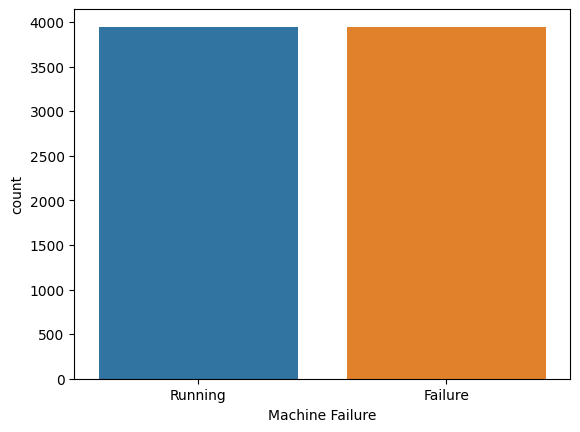

In [49]:
# check
sns.countplot(x=y_train)
plt.show()

# 5. Reducing Dimensionality

## Training een PCA Model

In [50]:
# importen 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
# Standard Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

In [52]:
# reset opties in pandas om te voorkomen dat het heel lang duurt
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [53]:
# check scaled data
temp_scaled_df = pd.DataFrame(scaled_data)
temp_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.418440,-0.053040,1.137293,0.637348,0.488212,0.637348,-1.230499,-0.519436,0.572807,0.712748,...,-1.404123,-1.404123,1.404123,-1.170054,-1.404123,1.404123,-0.167235,-1.972455,0.401198,-0.683338
1,0.121370,0.808273,-0.240593,-2.355533,0.169933,-2.355533,-0.202587,-1.390809,1.549670,-0.145058,...,1.440560,1.440560,-1.440560,-0.338511,1.440560,-1.440560,-1.313994,-1.683178,-2.298113,2.248787
2,-0.094825,-1.359711,-0.606598,-1.688188,-0.421696,-1.688188,0.939288,-0.447043,-0.877237,-0.376912,...,0.643988,0.643988,-0.643988,-0.118357,0.643988,-0.643988,-0.547590,-0.356878,-2.122790,0.786822
3,-0.490874,-0.615090,-1.478109,-1.528313,2.345048,-1.528313,0.778745,-1.122162,1.641700,0.797564,...,1.205358,1.205358,-1.205358,0.293926,1.205358,-1.205358,-0.359439,0.882761,-1.476831,1.578540
4,0.865233,0.014374,1.447633,-0.513286,-2.993744,-0.513286,0.102170,-0.394057,-1.016226,-0.949897,...,2.651641,2.651641,-2.651641,0.358064,2.651641,-2.651641,-0.277856,0.474152,-0.957608,1.729775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887,-0.685185,1.469389,0.350635,0.241571,-0.762625,0.241571,0.358809,0.279293,0.027959,0.893797,...,0.375491,0.375491,-0.375491,2.901273,0.375491,-0.375491,0.382431,0.550366,0.754436,0.378636
7888,-0.487481,-0.373836,-0.385733,0.216903,-0.387365,0.216903,-1.470892,-0.692224,0.560882,0.061950,...,-0.680886,-0.680886,0.680886,0.646221,-0.680886,0.680886,-0.505551,-0.919886,0.767377,-0.258334
7889,-1.949488,0.874560,0.614584,0.230341,-0.684645,0.230341,-0.619089,-0.051260,0.913931,0.872179,...,-1.742590,-1.742590,1.742590,-0.425599,-1.742590,1.742590,-0.775780,1.843476,0.412247,-0.202908
7890,-0.899388,-0.083488,0.736062,-0.168941,0.227375,-0.168941,0.662168,-0.940474,-1.798793,-0.197199,...,1.289479,1.289479,-1.289479,1.778031,1.289479,-1.289479,-0.408670,0.372710,0.565369,0.570855


In [54]:
fit_pca = {}
# de range staat voor het aantal components die gaat testen (dus van 2 t/m het aantal kolommen)
for component in [*range(2, len(X_train.columns)-1)]:
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    fit_pca[component] = pca

## Evaluating met Scree Plot

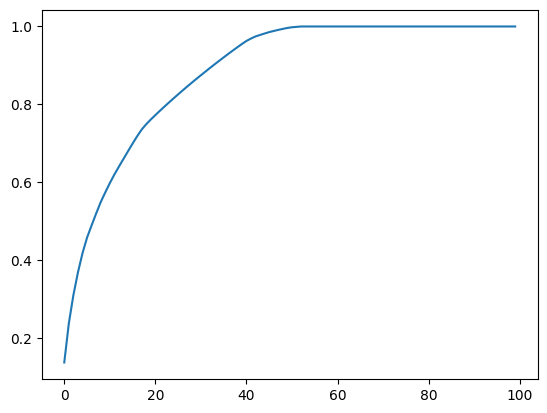

In [55]:
# Scree plot
plt.plot(fit_pca[100].explained_variance_ratio_.cumsum())
plt.show()

# 6. Modelling

## Import Dependencies

In [56]:
# importeren
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Pipelines en Grids

In [57]:
# pipeline
pipelines = {
    'sgd': make_pipeline(StandardScaler(), PCA(n_components=50), SGDClassifier(random_state=1234)),
    'ridge': make_pipeline(StandardScaler(), PCA(n_components=50), RidgeClassifier(random_state=1234)),
    'rf': make_pipeline(StandardScaler(), PCA(n_components=50), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), PCA(n_components=50), GradientBoostingClassifier(random_state=1234))
}

In [65]:
# grid
grid = {
    'sgd': {
        'sgdclassifier__alpha':[0.0001, 0.001, 0.01, 0.1]
    },
    'ridge': {
        'ridgeclassifier__alpha':[0.01, 0.5, 1.0, 2.0, 3.0]
    },
    'rf': {
        'randomforestclassifier__n_estimators':[50,100,200,300,400],
        'randomforestclassifier__max_depth':[None, 5, 7, 9]
    },
    'gb': {
        'gradientboostingclassifier__n_estimators':[50,100,200,300,400],
        'gradientboostingclassifier__max_depth':[None, 5, 7, 9]
    }
}

## Train Models

In [67]:
# Train pipeline
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(f'Training: {algo}')
        model = GridSearchCV(pipeline, grid[algo], cv=10, n_jobs=-1)
        model.fit(X_train, y_train)
        fit_models[algo] = model
    except Exception as e:
        print(f'Something went wrong with {algo}: {e}')

Training: sgd
Training: ridge
Training: rf
Training: gb


# 7. Evaluate

## Classification Metrics

In [68]:
# importeren
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [69]:
# loop door algo's en metrics
for algo, model in fit_models.items():
    # predict
    yhat = model.predict(X_test)
    # uitcomes omzetten naar binary variables (1 & 0)
    y_test_bin = [1 if val=='Failure' else 0 for val in y_test]
    yhat_bin = [1 if val=='Failure' else 0 for val in yhat]
    
    f1 = f1_score(y_test_bin, yhat_bin)
    precision = precision_score(y_test_bin, yhat_bin)
    recall = recall_score(y_test_bin, yhat_bin)
    print(f'{algo} score- F1: {f1}, Precision: {precision}, Recall: {recall}')

sgd score- F1: 0.9831775700934579, Precision: 0.9850187265917603, Recall: 0.9813432835820896
ridge score- F1: 0.7204301075268817, Precision: 0.5630252100840336, Recall: 1.0
rf score- F1: 0.8795620437956205, Precision: 0.8607142857142858, Recall: 0.8992537313432836
gb score- F1: 0.9192100538599641, Precision: 0.8858131487889274, Recall: 0.9552238805970149


## Confusion Matrix

In [70]:
# set beste model
model = fit_models['sgd']

In [71]:
# confusion matrix
yhat = model.predict(X_test)
confusion_matrix(y_test, yhat, labels=['Failure', 'Running'])

array([[ 263,    5],
       [   4, 1687]], dtype=int64)

# 8. Deploy

## Save Model

In [72]:
# import
import pickle

In [73]:
# save model
with open('sgd.pkl', 'wb') as f:
    pickle.dump(fit_models['sgd'], f)

## Load Model en PCA

In [74]:
# load model
with open('sgd.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [75]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=1234))]),
             n_jobs=-1,
             param_grid={'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1]})

In [76]:
best_model.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, random_state=1234))])

## Laad nieuwe data

In [77]:
con = sqlite3.connect(DB_PATH)
cur = con.cursor()

In [78]:
# sql om data op te halen
ALL_DATA_STATEMENT = '''
    SELECT
        *
    FROM
        scoring
'''

In [79]:
res = cur.execute(ALL_DATA_STATEMENT)
scoring_data = res.fetchall()

In [80]:
# check
scoring_data[0]

(0.585750267,
 0.710869607,
 0.961794667,
 0.535206619,
 1.327430447,
 5.352066187,
 2.22607639,
 -1.417258473,
 -0.713737924,
 8.562829403,
 16.39160088,
 4.951562638,
 -0.718585299,
 0.408525618,
 1.355492864,
 8.562829403,
 16.39160088,
 4.951562638,
 -0.718585299,
 0.408525618,
 1.355492864,
 3.428719582,
 1.106577233,
 1.11514823,
 1.323574168,
 10.11588308,
 10.11682425,
 10.14191431,
 14.2631577,
 14.26382522,
 14.28163167,
 17.45119609,
 17.45174167,
 17.46629841,
 20.14077511,
 20.14124784,
 20.1538621,
 7.780123508,
 3.931760705,
 0.584022231,
 1.122251072,
 1.327430447,
 0.226696568,
 0.448505463,
 0.870023899,
 0.3377122,
 1.327430447,
 0.088459375,
 0.151465766,
 4.114463499,
 0.393176071,
 0.134966025,
 0.134966025,
 0.245027471,
 0.218335698,
 0.007162028,
 7.584955892,
 0.680767942,
 0.936767115,
 1.848734853,
 5.897993892,
 7.07759267,
 0.680767942,
 0.379614982,
 2.326892699,
 7.07759267,
 8.493111204,
 10.19173345,
 12.23008013,
 14.67609616,
 17.61131539,
 21.133578

In [81]:
# omzetten naar DF
col = np.array(cur.description)[:,0]
scoring = pd.DataFrame(scoring_data, columns=col)
scoring.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
0,0.585750,0.710870,0.961795,0.535207,1.327430,5.352066,2.226076,-1.417258,-0.713738,8.562829,...,2.026752,2.128090,-2.229427,1.848735,3.040128,-0.709363,2.262458,4.951563,52.587106,14.281632
1,1.394299,0.528989,0.403531,0.562596,1.060444,5.625960,1.060982,1.135943,1.141834,28.130973,...,1.035123,1.086879,-1.138635,1.508479,1.552685,-0.362293,-0.873339,16.082543,24.111206,14.334397
2,2.269294,0.324147,-0.033710,2.277046,-0.041533,22.770459,2.366656,-13.778314,-1.534053,13.036520,...,1.726419,1.812740,-1.899061,1.184088,2.589629,-0.604247,0.854719,9.455773,70.558905,14.330505
3,1.246255,1.932317,2.315582,0.766818,1.328568,7.668182,3.359558,4.186759,0.975112,-0.464028,...,0.797737,0.837624,-0.877511,-0.106852,1.196606,-0.279208,-0.881114,23.510027,84.022643,14.339029
4,0.325781,1.895224,0.821280,2.313757,0.544863,23.137572,0.278491,0.412551,0.384150,14.307797,...,4.407654,4.628036,-4.848419,-0.632701,6.611480,-1.542679,4.790277,18.829649,75.828002,14.474880


## Maak Predictions

In [82]:
# predict
yhat = best_model.predict(scoring); yhat

array(['Running', 'Running', 'Running', ..., 'Running', 'Running',
       'Running'], dtype='<U7')

In [83]:
# Predictions kollom toevoegen
scoring['Predictions'] = yhat

In [84]:
# check
scoring.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Predictions
0,0.585750,0.710870,0.961795,0.535207,1.327430,5.352066,2.226076,-1.417258,-0.713738,8.562829,...,2.128090,-2.229427,1.848735,3.040128,-0.709363,2.262458,4.951563,52.587106,14.281632,Running
1,1.394299,0.528989,0.403531,0.562596,1.060444,5.625960,1.060982,1.135943,1.141834,28.130973,...,1.086879,-1.138635,1.508479,1.552685,-0.362293,-0.873339,16.082543,24.111206,14.334397,Running
2,2.269294,0.324147,-0.033710,2.277046,-0.041533,22.770459,2.366656,-13.778314,-1.534053,13.036520,...,1.812740,-1.899061,1.184088,2.589629,-0.604247,0.854719,9.455773,70.558905,14.330505,Running
3,1.246255,1.932317,2.315582,0.766818,1.328568,7.668182,3.359558,4.186759,0.975112,-0.464028,...,0.837624,-0.877511,-0.106852,1.196606,-0.279208,-0.881114,23.510027,84.022643,14.339029,Running
4,0.325781,1.895224,0.821280,2.313757,0.544863,23.137572,0.278491,0.412551,0.384150,14.307797,...,4.628036,-4.848419,-0.632701,6.611480,-1.542679,4.790277,18.829649,75.828002,14.474880,Running


In [87]:
# check twee
scoring.describe(include='object')

,Predictions
count,2153
unique,2
top,Running
freq,1864


## Check of Predictions Table Exists, Niet? Create It

In [88]:
# check of Predictions bestaat
PREDICTIONS_TABLE = '''
    SELECT
        name
    FROM
        sqlite_master
    WHERE
        type="table"
    AND
        name="predictions";
'''

In [92]:
res = cur.execute(PREDICTIONS_TABLE)
tables = res.fetchall()

In [93]:
tables

[('predictions',)]

In [91]:
# creëer Predictions table
cur.execute(f'CREATE TABLE predictions {tuple(scoring.columns)}')

## Push back in Database

In [95]:
# creëer template
tups = [tuple(val) for val in scoring.values]
val_template = str('?,'*len(tups[0]))[:-1]

In [97]:
val_template

'?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?'

In [100]:
# push de data in de DB
cur.executemany(f'INSERT INTO predictions VALUES ({val_template})', tups)

## Check Loaded Resultaten

In [101]:
res = cur.execute('SELECT * FROM predictions')
predictions = res.fetchall()

In [103]:
# omzetten naar DF
col = np.array(cur.description)[:,0]
predictions = pd.DataFrame(predictions, columns=col)
predictions.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Predictions
0,0.585750,0.710870,0.961795,0.535207,1.327430,5.352066,2.226076,-1.417258,-0.713738,8.562829,...,2.128090,-2.229427,1.848735,3.040128,-0.709363,2.262458,4.951563,52.587106,14.281632,Running
1,1.394299,0.528989,0.403531,0.562596,1.060444,5.625960,1.060982,1.135943,1.141834,28.130973,...,1.086879,-1.138635,1.508479,1.552685,-0.362293,-0.873339,16.082543,24.111206,14.334397,Running
2,2.269294,0.324147,-0.033710,2.277046,-0.041533,22.770459,2.366656,-13.778314,-1.534053,13.036520,...,1.812740,-1.899061,1.184088,2.589629,-0.604247,0.854719,9.455773,70.558905,14.330505,Running
3,1.246255,1.932317,2.315582,0.766818,1.328568,7.668182,3.359558,4.186759,0.975112,-0.464028,...,0.837624,-0.877511,-0.106852,1.196606,-0.279208,-0.881114,23.510027,84.022643,14.339029,Running
4,0.325781,1.895224,0.821280,2.313757,0.544863,23.137572,0.278491,0.412551,0.384150,14.307797,...,4.628036,-4.848419,-0.632701,6.611480,-1.542679,4.790277,18.829649,75.828002,14.474880,Running
